<a href="https://colab.research.google.com/github/Zcalory/C-Programming-Practice-Problems-/blob/master/Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pipeline
* data preprocessing
* network structure
* loss function
* optimization 
* result visualization

## Colab dependency


---



In [0]:
#Install PyDrive package
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
#Authentication
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


------------------------------------------

In [0]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Dataset are preprocessed offline and are upload to GD.
Here we can just load them and use them.

In [0]:
file_dir=r"/content/drive/My Drive/colaboratory"
train_file=r"/content/drive/My Drive/colaboratory/first_train_300.tfrecords-000"
test_file=r"/content/drive/My Drive/colaboratory/first_test_20.tfrecords-000"

## Load dataset

In [0]:
def _parse_record(element):
    features = {
        'shape': tf.FixedLenFeature([3], tf.int64),
        'img_data': tf.FixedLenFeature((), tf.string),
        'mask_data': tf.FixedLenFeature((), tf.string)
    }
    parsed_features = tf.parse_single_example(element, features)
    return parsed_features


batch_num=5
trnset=tf.data.TFRecordDataset(train_file)
trnset=trnset.map(_parse_record)
trnset=trnset.shuffle(buffer_size=50).batch(batch_num)

testset=tf.data.TFRecordDataset(test_file)
testset=testset.map(_parse_record)
testset=testset.shuffle(buffer_size=20).batch(1)


# dataset_iter = testset.make_one_shot_iterator()
# next_ele = dataset_iter.get_next()
# print("start......")
# data_num=0
# with tf.Session() as sess:
#   while True:
#     try:
#       f=sess.run(next_ele)
#       shape=f["shape"]
#       data_num+=1
#     except tf.errors.OutOfRangeError:
#       print("data number:",data_num,shape)
#       break

In [0]:
def compute_accuracy(testimg, label):
  print(type(testimg),testimg.shape)
  global pred
  result=sess.run(pred,feed_dict={x_input:testimg})
#     #y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
#     correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
#     accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#     result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
#     return result
#   plt.figure()
#   plt.subplot(1,3,1)
#   plt.imshow(testimg)
#   plt.subplot(1,3,2)
#   plt.imshow(label.squeeze(),cmap='Greys_r')
#   plt.subplot(1,3,3)
#   plt.imshow(result.squeeze(),cmap='Greys_r')
#   plt.show()
  return result

def max_pool_2x2(data):
    return tf.nn.max_pool(data,strides=[1,2,2,1],ksize=[1,2,2,1],padding="SAME")

class conlayer_left():
    
    def __init__(self,ker,in_c,out_c):
        self.w = tf.Variable(tf.random_normal([ker,ker,in_c,out_c],stddev=0.05),dtype=tf.float32)

    def feedforward(self,input,stride=1,dilate=1):
        self.input  = input
        self.layer  = tf.nn.conv2d(input,self.w,strides = [1,stride,stride,1],padding='SAME')
        self.layerA = tf.nn.relu(self.layer)
        return self.layerA

batch_size=5
class conlayer_right():
    
    def __init__(self,ker,in_c,out_c):
        self.w = tf.Variable(tf.random_normal([ker,ker,out_c,in_c],stddev=0.05),dtype=tf.float32)

    def feedforward(self,input,stride=1,dilate=1,output=1):
        self.input  = input

        current_shape_size = input.shape

        self.layer = tf.nn.conv2d_transpose(input,self.w,output_shape=[batch_size]\
                                            + [int(current_shape_size[1].value*2),int(current_shape_size[2].value*2),int(current_shape_size[3].value/2)],\
                                            strides=[1,2,2,1],padding='SAME')
        self.layerA = tf.nn.relu(self.layer)
        return self.layerA

In [0]:
def data2tensor(img_data,mask_data,shape):
  '''
  
  '''
  img_list=[]
  mask_list=[]
  num=len(shape)
  for i in range(num):
    img=np.fromstring(img_data[i],dtype=np.uint8)
    mask=np.fromstring(mask_data[i],dtype=np.uint8)
    #print(len(mask),len(img),type(img_data),img_data.shape)
    img_shape=shape[i]
    img=np.reshape(img,img_shape)
    mask=np.reshape(mask,[img_shape[0],img_shape[1],1])
    img_list.append(img)
    mask_list.append(mask)
  img_array=np.array(img_list,dtype=np.uint8)
  mask_array=np.array(mask_list,dtype=np.uint8)
  return img_array,mask_array
  #print(img_array.shape)
  #img_tensor=tf.convert_to_tensor(img_array,dtype=tf.float32)
  #mask_tensor=tf.convert_to_tensor(mask_array,dtype=tf.float32)
  #print(tf.shape(img_tensor),img_tensor.get_shape())
  #return img_tensor,mask_tensor
    
  

In [0]:
#Create U-net structure
#base channel number
bcn=64
l1_1=conlayer_left(3,3,bcn)
l1_2=conlayer_left(3,bcn,bcn)

l2_1=conlayer_left(3,bcn,bcn*2)
l2_2=conlayer_left(3,bcn*2,bcn*2)

l3_1=conlayer_left(3,bcn*2,bcn*4)
l3_2=conlayer_left(3,bcn*4,bcn*4)

l4_1=conlayer_left(3,bcn*4,bcn*8)
l4_2=conlayer_left(3,bcn*8,bcn*8)

l5_1=conlayer_left(3,bcn*8,bcn*16)
l5_2=conlayer_left(3,bcn*16,bcn*16)
l5_3=conlayer_right(3,bcn*16,bcn*8)

#l6_1=conlayer_right(3,bcn*16,bcn*8)
#l6_2=conlayer_right(3,bcn*8,bcn*8)
l6_1=conlayer_left(3,bcn*16,bcn*8)
l6_2=conlayer_left(3,bcn*8,bcn*8)
l6_3=conlayer_right(3,bcn*8,bcn*4)

l7_1=conlayer_left(3,bcn*8,bcn*4)
l7_2=conlayer_left(3,bcn*4,bcn*4)
l7_3=conlayer_right(3,bcn*4,bcn*2)

l8_1=conlayer_left(3,bcn*4,bcn*2)
l8_2=conlayer_left(3,bcn*2,bcn*2)
l8_3=conlayer_right(3,bcn*2,bcn)

l9_1=conlayer_left(3,bcn*2,bcn)
l9_2=conlayer_left(3,bcn,bcn)

l10=conlayer_left(1,bcn,1)

In [0]:
x_input = tf.placeholder(shape=[None,256,256,3],dtype=tf.float32) #256*256*3
label = tf.placeholder(shape=[None,256,256,1],dtype=tf.float32)

layer1_1=l1_1.feedforward(x_input) #256*256*64
layer1_2=l1_2.feedforward(layer1_1)#256*256*64

layer2=max_pool_2x2(layer1_2) #128*128*64
layer2_1=l2_1.feedforward(layer2)#128*128*128
layer2_2=l2_2.feedforward(layer2_1)#128*128*128

layer3=max_pool_2x2(layer2_2)#64*64*128
layer3_1=l3_1.feedforward(layer3)#64*64*256
layer3_2=l3_2.feedforward(layer3_1)#64*64*256

layer4=max_pool_2x2(layer3_2)#32*32*256
layer4_1=l4_1.feedforward(layer4)#32*32*512
layer4_2=l4_2.feedforward(layer4_1)#32*32*512

layer5=max_pool_2x2(layer4_2)#16*16*512
layer5_1=l5_1.feedforward(layer5)#16*16*1024
layer5_2=l5_2.feedforward(layer5_1)#16*16*1024

layer5_3=l5_3.feedforward(layer5_2)#32*32*512

layer6=tf.concat([layer4_2,layer5_3],axis=3) #32*32*1024
#print(layer6.shape)
layer6_1=l6_1.feedforward(layer6)#32*32*512
#print(layer6_1)
layer6_2=l6_2.feedforward(layer6_1)#32*32*512

layer6_3=l6_3.feedforward(layer6_2)#64*64*256

layer7=tf.concat([layer3_2,layer6_3],axis=3)#64*64*512
layer7_1=l7_1.feedforward(layer7)#64*64*256
layer7_2=l7_2.feedforward(layer7_1)#64*64*256

layer7_3=l7_3.feedforward(layer7_2)#128*128*128

layer8=tf.concat([layer2_2,layer7_3],axis=3)#128*128*256
layer8_1=l8_1.feedforward(layer8)#128*128*128
layer8_2=l8_2.feedforward(layer8_1)#128*128*128

layer8_3=l8_3.feedforward(layer8_2)#256*256*64

layer9=tf.concat([layer1_2,layer8_3],axis=3)#256*256*128
layer9_1=l9_1.feedforward(layer9)#256*256*64
layer9_2=l9_2.feedforward(layer9_1)#256*256*64

pred=l10.feedforward(layer9_2)#256*256*1

cost=tf.reduce_mean(tf.square(pred-label))
auto_train = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

In [0]:
num_epoch=100
batch_num=5
trnset=tf.data.TFRecordDataset(train_file)
trnset=trnset.map(_parse_record)
trnset=trnset.shuffle(buffer_size=50).batch(batch_num).repeat(num_epoch)
dataset_iter = trnset.make_one_shot_iterator()
next_ele = dataset_iter.get_next()

testset=tf.data.TFRecordDataset(test_file)
testset=testset.map(_parse_record)
testset=testset.shuffle(buffer_size=20).batch(1)
testset_iter = testset.make_one_shot_iterator()
test_ele = testset_iter.get_next()

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for i in range(int(num_epoch*300/batch_num)):
    element=sess.run(next_ele)
    shape = element["shape"]
    img_data=element["img_data"]
    mask_data=element["mask_data"]
    
    img,mask = data2tensor(img_data,mask_data,shape)
    
    result=sess.run([cost,auto_train],feed_dict={x_input:img,label:mask})
    if (i%(300/batch_num)==0):
       print("epoch:",i/300*batch_num,"cost:",result[0])
#       test_e=sess.run(test_ele)
#       t_shape = test_e["shape"]
#       t_img_data=test_e["img_data"]
#       t_mask_data=test_e["mask_data"]
      
#       t_img,t_mask = data2tensor(t_img_data,t_mask_data,t_shape)
      
      #img_data=np.fromstring(t_img_data[0],dtype=np.uint8)
      #mask_data=np.fromstring(t_mask_data[0],dtype=np.uint8)
      #print(len(t_img_data),len(t_mask_data),t_img_data.shape,type(t_img_data))
      #img=np.reshape(img_data,[256,256,3])
      #mask=np.reshape(mask_data,[256,256,1])

      #pred=compute_accuracy(t_img,t_mask)
      
     # plt.figure()
     # plt.subplot(1,3,1)
      #plt.imshow(img)
      #plt.subplot(1,3,2)
      #plt.imshow(mask.squeeze(),cmap='Greys_r')
      #plt.subplot(1,3,3)
      #plt.imshow(pred.squeeze(),cmap='Greys_r')
      #plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # Remove the CWD from sys.path while we load stuff.


epoch: 0.0 cost: 105923120.0
epoch: 1.0 cost: 14204.326
epoch: 2.0 cost: 8632.154
epoch: 3.0 cost: 12265.567
epoch: 4.0 cost: 12887.178
epoch: 5.0 cost: 11061.838
epoch: 6.0 cost: 17226.334
epoch: 7.0 cost: 15507.987
epoch: 8.0 cost: 17561.95
epoch: 9.0 cost: 18570.785
epoch: 10.0 cost: 12699.345
epoch: 11.0 cost: 16739.39
epoch: 12.0 cost: 10974.526
epoch: 13.0 cost: 9416.715
epoch: 14.0 cost: 16875.225
epoch: 15.0 cost: 11630.182
epoch: 16.0 cost: 17342.385
epoch: 17.0 cost: 13319.969
epoch: 18.0 cost: 10333.797
epoch: 19.0 cost: 14054.945
epoch: 20.0 cost: 13386.643
epoch: 21.0 cost: 16539.521
epoch: 22.0 cost: 13270.3
epoch: 23.0 cost: 15363.885
epoch: 24.0 cost: 12898.35
epoch: 25.0 cost: 8720.322
epoch: 26.0 cost: 8073.8374
epoch: 27.0 cost: 11625.327
epoch: 28.0 cost: 11367.799
epoch: 29.0 cost: 12643.6875
epoch: 30.0 cost: 11490.933
epoch: 31.0 cost: 8081.2334
epoch: 32.0 cost: 13423.498
epoch: 33.0 cost: 12229.91
epoch: 34.0 cost: 10752.541
epoch: 35.0 cost: 8972.424
epoch: 36

start......
[256 256   3]
65536 196608


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


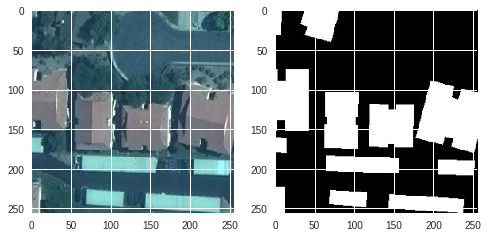

<class 'numpy.ndarray'>


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
data_path=r"/content/drive/My Drive/colaboratory/small.tfrecords-000"
def _parse_record(element):
    features = {
        'shape': tf.FixedLenFeature([3], tf.int64),
        'img_data': tf.FixedLenFeature((), tf.string),
        'mask_data': tf.FixedLenFeature((), tf.string)
    }
    parsed_features = tf.parse_single_example(element, features)
    return parsed_features

#tf.device('/gpu:2')
#os.environ['CUDA_VISIBLE_DEVICES']='0,1,2,3'
dataset = tf.data.TFRecordDataset(test_file)
dataset = dataset.map(_parse_record)
dataset_iter = dataset.make_one_shot_iterator()
next_ele = dataset_iter.get_next()
print("start......")
with tf.Session() as sess:
    f = sess.run(next_ele)
    shape = f["shape"]
    print(shape)
    img=f["img_data"]
    mask=f["mask_data"]
    img_data=np.fromstring(img,dtype=np.uint8)
    mask_data=np.fromstring(mask,dtype=np.uint8)
    print(len(mask),len(img))
    img=np.reshape(img_data,shape)
    mask=np.reshape(mask_data,[256,256,1])
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.imshow(mask.squeeze(),cmap='Greys_r')
    plt.show()
    print(type(img))

start......
[256 256   3]
65536 196608 <class 'numpy.ndarray'> (196608,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


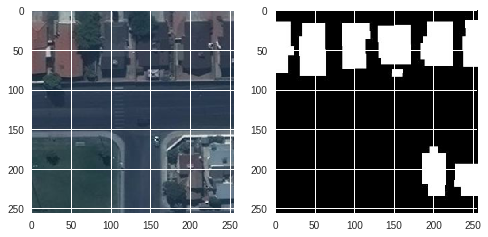

<class 'numpy.ndarray'>


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
data_path=r"/content/drive/My Drive/colaboratory/small.tfrecords-000"
def _parse_record(element):
    features = {
        'shape': tf.FixedLenFeature([3], tf.int64),
        'img_data': tf.FixedLenFeature((), tf.string),
        'mask_data': tf.FixedLenFeature((), tf.string)
    }
    parsed_features = tf.parse_single_example(element, features)
    return parsed_features

#tf.device('/gpu:2')
#os.environ['CUDA_VISIBLE_DEVICES']='0,1,2,3'
dataset = tf.data.TFRecordDataset(test_file)
dataset = dataset.map(_parse_record)
dataset_iter = dataset.make_one_shot_iterator()
next_ele = dataset_iter.get_next()
print("start......")
with tf.Session() as sess:
    f = sess.run(next_ele)
    shape = f["shape"]
    print(shape)
    img=f["img_data"]
    mask=f["mask_data"]
    img_data=np.fromstring(img,dtype=np.uint8)
    mask_data=np.fromstring(mask,dtype=np.uint8)
    print(len(mask),len(img),type(img_data),img_data.shape)
    img=np.reshape(img_data,shape)
    mask=np.reshape(mask_data,[256,256,1])
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.imshow(mask.squeeze(),cmap='Greys_r')
    plt.show()
    print(type(img))

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50,800)
data_path=r"/content/drive/My Drive/colaboratory/small.tfrecords-000"
def _parse_record(element):
    features = {
        'shape': tf.FixedLenFeature([3], tf.int64),
        'img_data': tf.FixedLenFeature((), tf.string),
        'mask_data': tf.FixedLenFeature((), tf.string)
    }
    parsed_features = tf.parse_single_example(element, features)
    return parsed_features

#tf.device('/gpu:2')
#os.environ['CUDA_VISIBLE_DEVICES']='0,1,2,3'
batch_num=2
dataset = tf.data.TFRecordDataset(test_file)
dataset = dataset.map(_parse_record)
dataset=dataset.shuffle(buffer_size=50).batch(batch_num)
dataset_iter = dataset.make_one_shot_iterator()
next_ele = dataset_iter.get_next()
print("start......")
with tf.Session() as sess:
    f = sess.run(next_ele)
    shape = f["shape"]
    img_data=f["img_data"]
    mask_data=f["mask_data"]
    #print(shape.shape,img.shape,mask.shape)
    #print(shape,len(img_data),type(img_data[0]))
    #plt.figure(figsize=(20,5))
    data2tensor(img_data,mask_data,shape)
#     for i in range(len(img_data)):
#       img=np.fromstring(img_data[i],dtype=np.uint8)
#       mask=np.fromstring(mask_data[i],dtype=np.uint8)
#       #print(img.shape,type(img))
#    # print(len(mask),len(img))
#       img=np.reshape(img,shape[i])
#       mask=np.reshape(mask,[256,256,1])
#       print(img.shape,mask.shape,type(img))
      #plt.subplot(len(img),2,2*i+1)
      #plt.imshow(img)
      #plt.subplot(len(img),2,2*i+2)
      #plt.imshow(mask.squeeze(),cmap='Greys_r')
      #plt.show()
    #print(type(img))

start......
Tensor("Shape_3:0", shape=(4,), dtype=int32) (2, 256, 256, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # Remove the CWD from sys.path while we load stuff.


In [0]:
a=np.zeros(shape=[2,2,3])
b=np.ones(shape=[2,2,3])
print(a.shape)

aa=a.tolist()
bb=b.tolist()
#c=np.concatenate((a,b),axis=-1)
#print(c.shape)
cc=[aa,bb]
c=np.array(c,dtype=np.uint8)
print(c.shape,c.dtype,type(a))

(2, 2, 3)
(2, 2, 2, 3) uint8 <class 'numpy.ndarray'>
